In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [315]:
electrode1 = 3
insulator1 = 0.5
electrode2 = electrode1
insulator2 = insulator1
electrode3 = electrode1

element_dimensions = [electrode1,
                      insulator1,
                      electrode2,
                      insulator2,
                      electrode3]


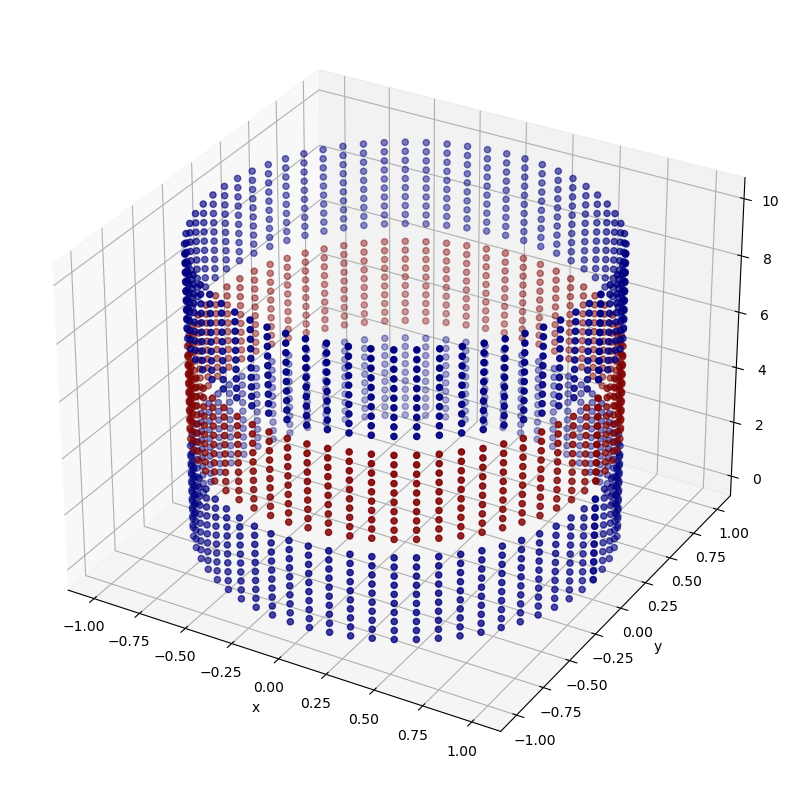

In [316]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

voltage = 1

zmin, zmax = 0, sum(element_dimensions)
zres = 32

thetamin,thetamax = 0, 2*np.pi
thetares = 64

radius = 1

zgrid = np.linspace(zmin,zmax,zres)
thetagrid = np.linspace(thetamin, thetamax, thetares)

zdata, tdata = np.meshgrid(zgrid,thetagrid)

xdata = radius*np.cos(tdata)
ydata = radius*np.sin(tdata)

z_idx = zdata.ravel()

entry_conductor_idx = (z_idx <= electrode1)
entry_insulator_idx = (z_idx > electrode1)*(electrode1+insulator1 >= z_idx)

lens_conductor_idx = (z_idx > electrode1+insulator1)*(electrode1+insulator1+electrode2 >= z_idx)

exit_insulator_idx = (z_idx > electrode1+insulator1+electrode2)*(electrode1+insulator1+electrode2+insulator2 >= z_idx)
exit_conductor_idx = (z_idx > electrode1+insulator1+electrode2+insulator2)

potential = np.zeros_like(z_idx)

potential[entry_conductor_idx] = 0
# potential[entry_insulator_idx] = 0.5
potential[lens_conductor_idx ] = voltage
# potential[exit_insulator_idx ] = 0.5
potential[exit_conductor_idx ] = 0

insulator_idx = (~entry_insulator_idx*~exit_insulator_idx)

# potential = potential.reshape(zdata.shape)

xelem, yelem = xdata.ravel()[insulator_idx], ydata.ravel()[insulator_idx]
zelem, potentialelem = zdata.ravel()[insulator_idx], potential[insulator_idx]

ax.scatter3D(xelem, yelem, zelem, c=potentialelem, cmap='jet')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [365]:
x_rav = xelem.ravel()
y_rav = yelem.ravel()
z_rav = zelem.ravel()

r_rav = np.sqrt(x_rav*x_rav + y_rav*y_rav + z_rav*z_rav)

xmin, xmax = xelem.min(), xelem.max()
ymin, ymax = yelem.min(), yelem.max()
zmin, zmax = zelem.min(), zelem.max()

rmin, rmax = 0, 4*radius
tmin, tmax = 0, 2*np.pi

xres, yres, zres, rres, tres = 10, 10, 32, 8, 16

xl, yl, zl = np.linspace(xmin,xmax,xres), np.linspace(ymin,ymax,yres), np.linspace(zmin,zmax,zres)

rl = np.linspace(rmin, rmax, rres)
tl = np.linspace(tmin,tmax, tres)

# xm, ym, zm = np.meshgrid(xl, yl, zl)

rm, tm, zm = np.meshgrid(rl, tl, zl)

xm, ym = rm*np.cos(tm), rm*np.sin(tm)

xr, yr, zr = xm.ravel(), ym.ravel() ,zm.ravel() 

rr = np.sqrt(xr*xr + yr*yr + zr*zr)

In [366]:
x_matrix = xr - x_rav[:,np.newaxis]
y_matrix = yr - y_rav[:,np.newaxis]
z_matrix = zr - z_rav[:,np.newaxis]

r_matrix = np.sqrt(x_matrix*x_matrix + y_matrix*y_matrix + z_matrix*z_matrix)

inv_r_matrix = 1/r_matrix

In [367]:
inv_r_matrix.shape, inv_r_matrix.min(), inv_r_matrix.max()

((1920, 4096), 0.08944286144460946, 7.00000000000001)

In [368]:
# phi(r) = int rho(r') / | r - r'| dr'
# potential = inv_r_matrix . rho
# inv_r_matrix^T potential = inv_r_matrix^T inv_r_matrix . rho
# rho = inv_r_matrix^T inv_r_matrix . inv_r_matrix^T potential

charge_density = np.linalg.pinv(inv_r_matrix.T@inv_r_matrix)@inv_r_matrix.T@potentialelem.ravel()

charge_density.shape

(4096,)

In [369]:
charge_density.max(), charge_density.min()

(0.47044222914701095, -0.465353858526214)

In [370]:
idx = ~(np.abs(charge_density) < 0)

np.sum(~idx)

0

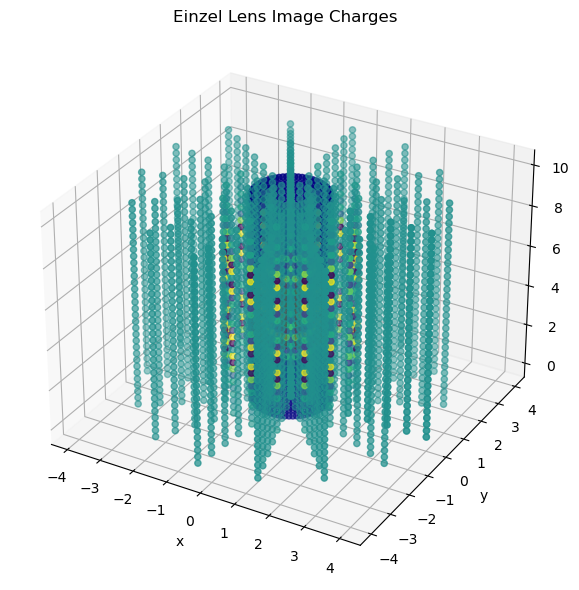

In [377]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')



ax.scatter3D(xr[idx], yr[idx], zr[idx], c=charge_density[idx], cmap='viridis')

ax.scatter3D(xelem, yelem, zelem, c=potentialelem, cmap='jet')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title("Einzel Lens Image Charges")
plt.tight_layout()
plt.show()

In [378]:
charge_density.shape, inv_r_matrix.shape

((4096,), (1920, 4096))

In [379]:
image_potential = inv_r_matrix@charge_density

In [380]:
image_potential.shape, z_rav.shape

((1920,), (1920,))

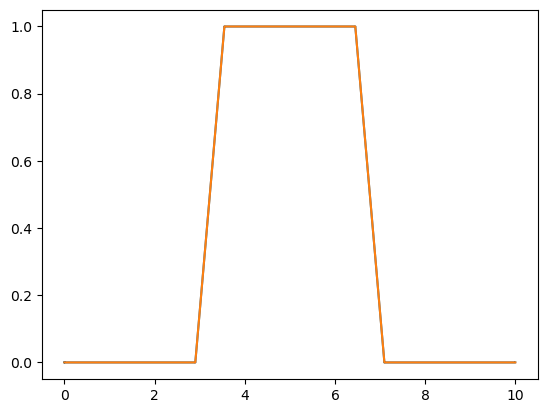

In [381]:
plt.plot(np.sort(z_rav), image_potential[np.argsort(z_rav)])
plt.plot(np.sort(zelem), potentialelem[np.argsort(zelem)]);

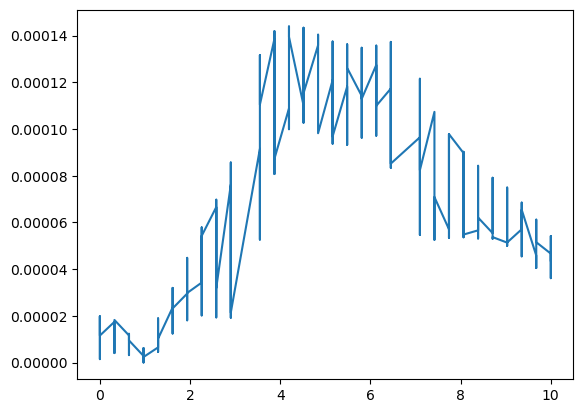

In [382]:


error = np.abs(image_potential - potentialelem)/np.abs(potentialelem.max())

plt.plot(np.sort(z_rav), error[np.argsort(z_rav)]);

In [386]:
xelem.shape

(1920,)

In [385]:
image_potential_grid = image_potential.reshape(xdata.shape)

ValueError: cannot reshape array of size 1920 into shape (64,32)

In [349]:
# fig = plt.figure(figsize=(10,10))
# ax = plt.axes(projection='3d')

# multipole_degree = 4

# zmin, zmax = 0, 10
# zres = 10

# thetamin,thetamax = 0, 2*np.pi
# thetares = 128

# radius = 1

# zdata = np.linspace(zmin,zmax,zres)
# thetadata = np.linspace(thetamin, thetamax, thetares)

# Z, T = np.meshgrid(zdata,thetadata)

# xdata = radius*np.cos(T)
# ydata = radius*np.sin(T)

# potential = np.cos(multipole_degree*T)

# xelem = xdata.ravel()
# yelem = xdata.ravel()
# zelem = Z.ravel()

# potentialelem = potential.ravel()

# ax.scatter3D(xdata, ydata, Z, c=potentialelem, cmap='plasma')

# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

# plt.show()

In [331]:
# x_rav = xdata.ravel()
# y_rav = ydata.ravel()
# z_rav = Z.ravel()

# r_rav = np.sqrt(x_rav*x_rav + y_rav*y_rav + z_rav*z_rav)

# xmin, xmax = xdata.min(), xdata.max()
# ymin, ymax = ydata.min(), ydata.max()
# zmin, zmax = zdata.min(), zdata.max()

# rmin, rmax = 0, 2
# tmin, tmax = 0, 2*np.pi

# xres, yres, zres, rres, tres = 10, 10, 16, 8, 2*multipole_degree

# xl, yl, zl = np.linspace(xmin,xmax,xres), np.linspace(ymin,ymax,yres), np.linspace(zmin,zmax,zres)

# rl = np.linspace(rmin, rmax, rres)
# tl = np.linspace(tmin,tmax, tres)

# # xm, ym, zm = np.meshgrid(xl, yl, zl)

# rm, tm, zm = np.meshgrid(rl, tl, zl)

# xm, ym = rm*np.cos(tm), rm*np.sin(tm)

# xr, yr, zr = xm.ravel() ,ym.ravel() ,zm.ravel() 

# rr = np.sqrt(xr*xr + yr*yr + zr*zr)

In [332]:
# x_matrix = xr - x_rav[:,np.newaxis]
# y_matrix = yr - y_rav[:,np.newaxis]
# z_matrix = zr - z_rav[:,np.newaxis]

# r_matrix = np.sqrt(x_matrix*x_matrix + y_matrix*y_matrix + z_matrix*z_matrix)

# inv_r_matrix = 1/r_matrix

In [333]:
# inv_r_matrix.shape, inv_r_matrix.min(), inv_r_matrix.max()

In [334]:
# # phi(r) = int rho(r') / | r - r'| dr'
# # potential = inv_r_matrix . rho
# # inv_r_matrix^T potential = inv_r_matrix^T inv_r_matrix . rho
# # rho = inv_r_matrix^T inv_r_matrix . inv_r_matrix^T potential

# charge_density = np.linalg.pinv(inv_r_matrix.T@inv_r_matrix)@inv_r_matrix.T@potentialelem.ravel()

# charge_density.shape

In [335]:
# charge_density.max(), charge_density.min()

In [336]:
# fig = plt.figure(figsize=(10,10))
# ax = plt.axes(projection='3d')

# # ax.scatter3D(xdata, ydata, zdata, c='k')#potential, cmap='plasma')

# ax.scatter3D(xr, yr, zr, c=charge_density, alpha = 1, cmap='viridis')

# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

# plt.show()